importing the necessary modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


loading and preprocessing the data

In [4]:
iris = load_iris()

print(iris.feature_names)
print(iris.target_names)

df = pd.DataFrame(iris.data , columns = iris.feature_names)
df['target'] = iris.target

df.head()

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


checking and observing the features of the each label

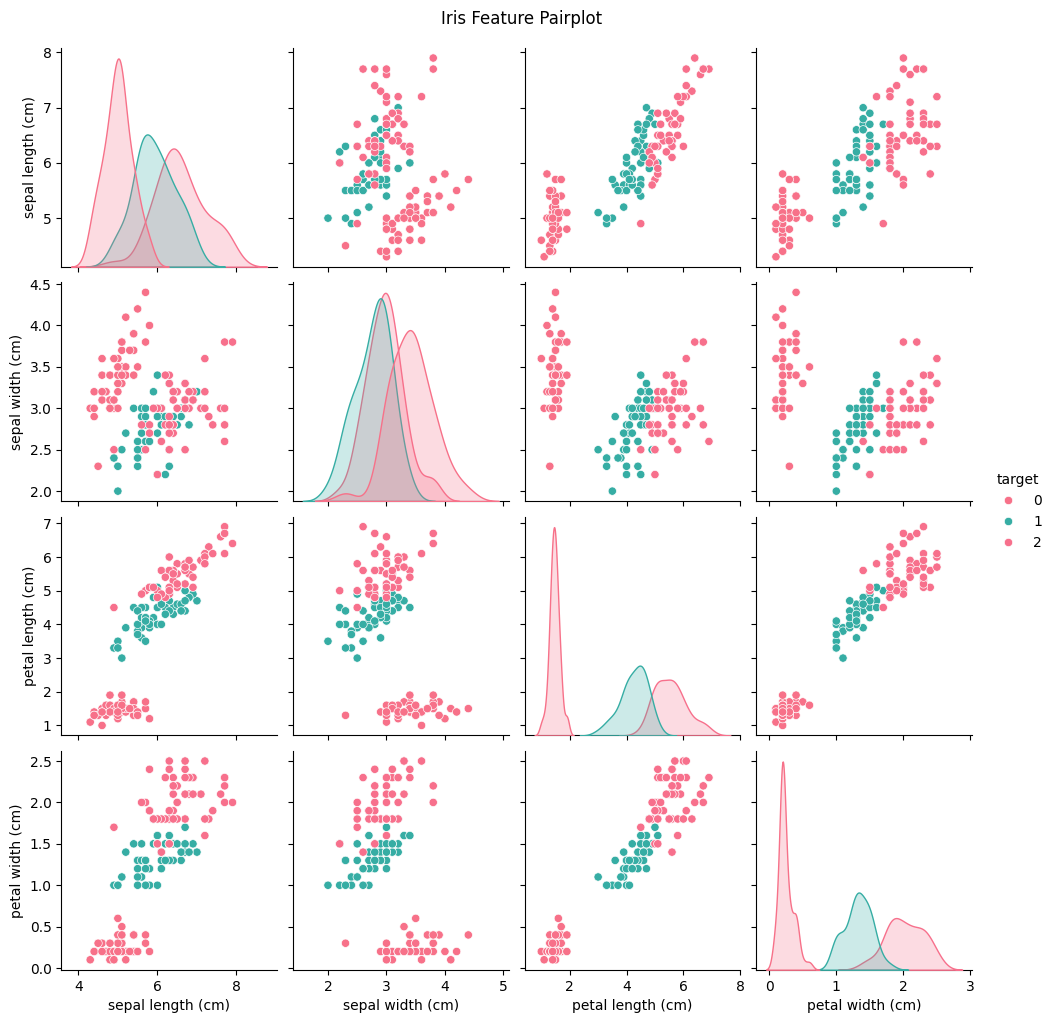

In [5]:
sns.pairplot(df, hue='target', palette='husl')
plt.suptitle("Iris Feature Pairplot", y=1.02)
plt.show()


correlation heat map to get how close the features are related and what are usefull

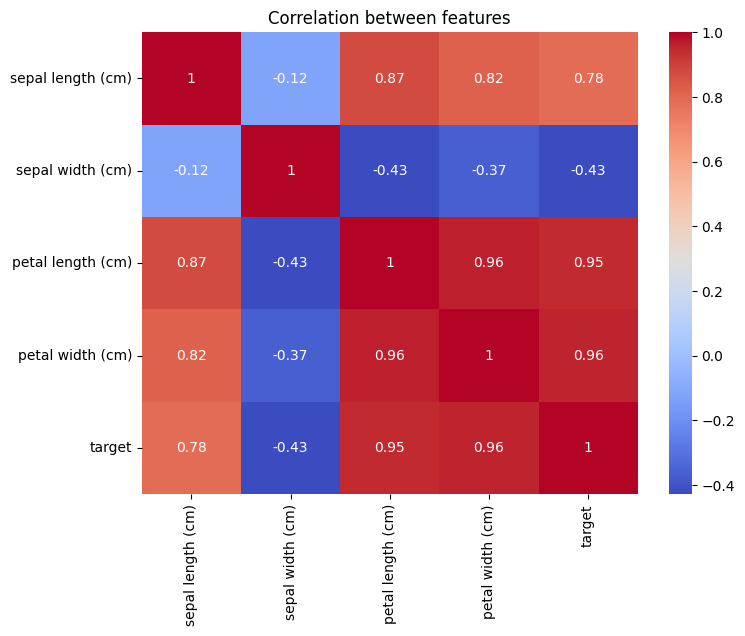

In [6]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation between features")
plt.show()

checking if the data set is balanced or not

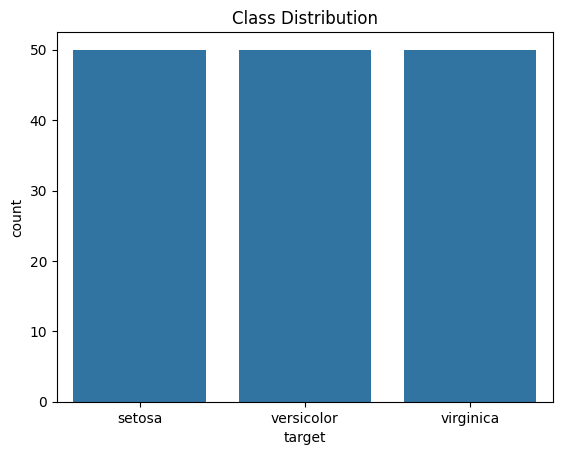

In [7]:
sns.countplot(x='target', data=df) #count plot is a bar chat used to count the tagret occurences and plot the in the graph
plt.xticks([0,1,2], iris.target_names)
plt.title("Class Distribution")
plt.show()

splitting and tarining a model

In [9]:
x = df.drop('target',axis=1)
y = df['target']

X_train, X_test , Y_train , Y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model = RandomForestClassifier(n_estimators=100 , random_state=42)
model.fit(X_train,Y_train)

RandomForestClassifier(random_state=42)

prediction amd evaluation of the model

In [10]:
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix

acc = accuracy_score(Y_test, y_pred)
cm = confusion_matrix(Y_test, y_pred)

print("Accuracy:", acc)
print("Confusion Matrix:\n", cm)

Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


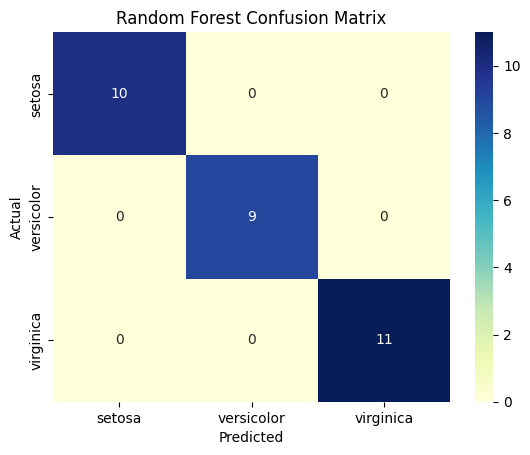

In [11]:
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

letrs check the feature importace (thsi is used to know which feature contributed how much or how uselful a feature wa s)

In [14]:
feature_imp = pd.Series(model.feature_importances_, index=x.columns)
print(feature_imp.sort_values(ascending=False))

petal length (cm)    0.439994
petal width (cm)     0.421522
sepal length (cm)    0.108098
sepal width (cm)     0.030387
dtype: float64


command line application

In [20]:
features = input("Enter sepal_length, sepal_width, petal_length, petal_width: ")
features = [float(x) for x in features.split(',')]

prediction = model.predict([features])
print("This flower is:", iris.target_names[prediction[0]])

Enter sepal_length, sepal_width, petal_length, petal_width: 0.2,0.3,0.4,0.5
🌺 This flower is: setosa


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
